In [29]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense,MaxPooling2D
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

In [30]:
pathtrain='train_happy.h5'
pathtest='test_happy.h5'

X_train,y_train,X_test,y_test=load_dataset(pathtrain,pathtest)
y_train=y_train[0]
y_test=y_test[0]

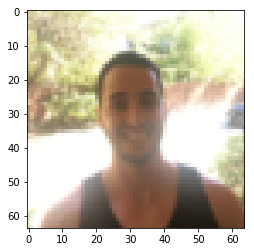

In [58]:



'''if y_train[1]==0:
    print('Person is not smiling.')
else:
    print('Person is smiling.')
plt.imshow(X_train[39
                  ])'''
plt.imshow(X_test[0])


In [32]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)



In [33]:
y_train[0]


array([1., 0.])

In [50]:
# using the sequential model from keras library
model=Sequential()
# applying the convolution with kernel size of 3
model.add(Conv2D(64,kernel_size=3,activation='sigmoid',use_bias=True,input_shape=(64,64,3)))

# applying the subsampling/pooling
model.add(MaxPooling2D())

# applying the convolution with kernel size of 3
model.add(Conv2D(32,kernel_size=3,activation='sigmoid',use_bias=True))

# applying the subsampling/pooling
model.add(MaxPooling2D())

# making the channels fully connected
model.add(Flatten())



# converting the fully connected layers to the output of size 2 i.e.(0,1)
model.add(Dense(2,activation='softmax'))

          

In [53]:
# using Adams's Optimizer and CrossMax Entropy as loss function
model.compile(loss = "categorical_crossentropy", optimizer = 'adam',metrics=['accuracy'])
# printing out the summary of the model and how it is working
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 12546     
Total params: 32,802
Trainable params: 32,802
Non-trainable params: 0
_________________________________________________________________


In [54]:
# fitting the dataset into the model with 3 epochs
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30)

Train on 600 samples, validate on 150 samples
Epoch 1/30
600/600 [==============================] - 6s 9ms/step - loss: 0.4662 - acc: 0.8033 - val_loss: 0.3849 - val_acc: 0.8267
Epoch 2/30
600/600 [==============================] - 4s 7ms/step - loss: 0.3092 - acc: 0.8883 - val_loss: 0.3178 - val_acc: 0.8667
Epoch 3/30
600/600 [==============================] - 5s 8ms/step - loss: 0.2656 - acc: 0.9133 - val_loss: 0.2782 - val_acc: 0.9000
Epoch 4/30
600/600 [==============================] - 5s 8ms/step - loss: 0.2466 - acc: 0.9050 - val_loss: 0.2488 - val_acc: 0.9267
Epoch 5/30
600/600 [==============================] - 5s 8ms/step - loss: 0.1995 - acc: 0.9483 - val_loss: 0.2247 - val_acc: 0.9133
Epoch 6/30
600/600 [==============================] - 5s 8ms/step - loss: 0.1883 - acc: 0.9400 - val_loss: 0.2260 - val_acc: 0.9333
Epoch 7/30
600/600 [==============================] - 5s 8ms/step - loss: 0.1619 - acc: 0.9500 - val_loss: 0.1916 - val_acc: 0.9467
Epoch 8/30
600/600 [==========

In [73]:
model.predict(X_test[:1])
# first index in for not simling and second index is for smiling

array([[1.1811050e-04, 9.9988186e-01]], dtype=float32)

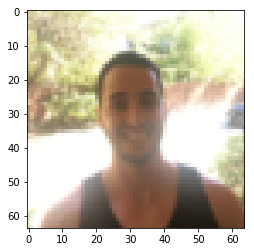

In [74]:
plt.imshow(X_test[0])
# results match